In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix 
from matplotlib.lines import Line2D

# Problem 1
Compare Gradient Descent and Newton's method using the cost function $\mathcal{L}(w) = w^2 + 1$

In [2]:
def L(w):
    return w**2 + 1

def L_prime(w):
    return 2 * w

def L_double_prime(w):
    return 2

In [3]:
# First, apply Newton's method
w_curr = 10
diff = 1 
newton_w_vals = [w_curr]
newton_l_vals = [L(w_curr)]
tol = 1e-6
while np.abs(diff) > tol:
    delta_w = -L_prime(w_curr) / L_double_prime(w_curr)
    w_new = w_curr + delta_w
    newton_w_vals.append(w_new)
    newton_l_vals.append(L(w_new))
    diff = np.abs(w_curr - w_new)
    w_curr = w_new

In [4]:
# Next,apply gradient descent
w_curr = 10
diff = 1
eta = 1e-1
gd_w_vals = [w_curr]
gd_l_vals = [L(w_curr)]
while np.abs(diff) > tol:
    w_new = w_curr + eta * -L_prime(w_curr)
    gd_w_vals.append(w_new)
    gd_l_vals.append(L(w_new))
    diff = np.abs(w_curr - w_new)
    w_curr = w_new

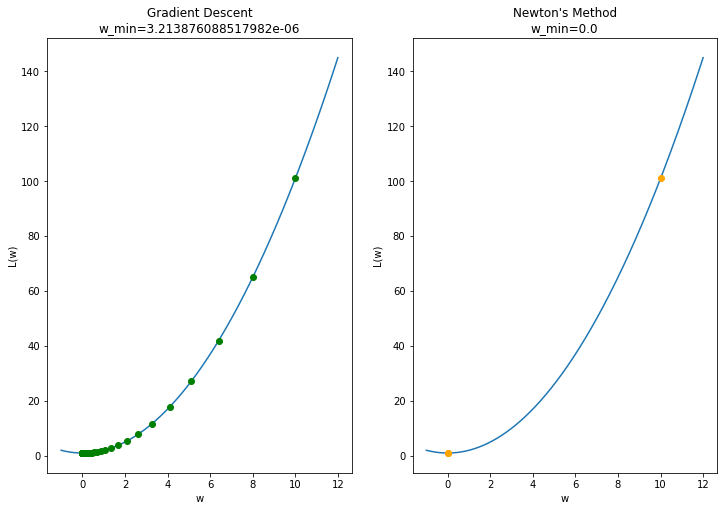

In [5]:
# Plot the results of each
x = np.linspace(-1, 12, 1000)
y = L(x)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].plot(gd_w_vals, gd_l_vals, 'o', color='green')
ax[0].set_title(f'Gradient Descent\nw_min={gd_w_vals[-1]}')
ax[0].set_ylabel('L(w)')
ax[0].set_xlabel('w')
ax[1].plot(x, y)
ax[1].plot(newton_w_vals, newton_l_vals, 'o', color='orange')
ax[1].set_title(f'Newton\'s Method\nw_min={newton_w_vals[-1]}')
ax[1].set_ylabel('L(w)')
ax[1].set_xlabel('w')
fig.savefig('figure_1.png', dpi=200)
plt.show()

# Problem 3

In [6]:
# Generate an index set of m = 100 equally spaced points on the unit interval
m_star = 100
X_star = np.linspace(0,1,m_star).reshape(-1,1)

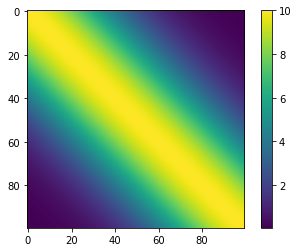

In [7]:
# Generate a covariance matrix K with a squared exponential
# convariance function where l=0.3
def k(x,xp,l=0.3,sigma2=10.0):
    dist = distance_matrix(x, xp, p=1)
    kernel = sigma2 * np.exp(-0.5 * np.square(dist) / l**2)
    return kernel

K = k(X_star,X_star)
plt.imshow(K)
plt.colorbar()
plt.show()

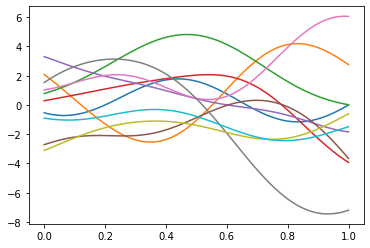

In [8]:
# Generate samples and plot them as a function of x
def sample(m, v, l,n_samples=10):
    G = v @ np.diag(np.sqrt(l))
    Z = np.random.normal(size=[m, n_samples])
    Y_sample = G @ Z
    return Y_sample

L, V = np.linalg.eig(K)
L[L < 0] = 0
L = L.real
V = V.real
s = sample(m_star,V, L, n_samples=10)
for i in range(10):
    plt.plot(X_star, s[:, i])
plt.show()

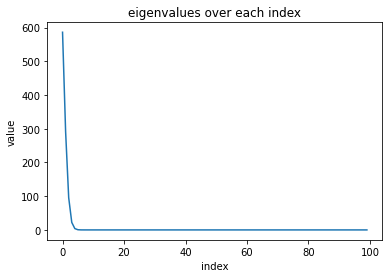

In [9]:
# Plot eigenvalues as a function of their index
plt.plot(L)
plt.title('eigenvalues over each index')
plt.ylabel('value')
plt.xlabel('index')
plt.show()

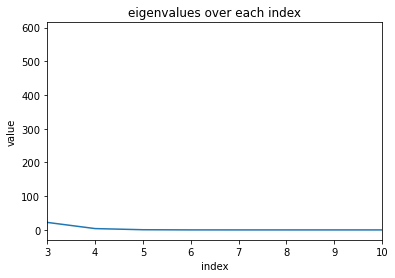

In [10]:
plt.plot(L)
plt.xlim(3, 10)
plt.title('eigenvalues over each index')
plt.ylabel('value')
plt.xlabel('index')
plt.show()

Based on the plot above, I will choose $h=3$.

In [11]:
h = 3
L_hat = L[:h]
V_hat = V[:, :h]
print(L.shape, V.shape)
print(L_hat.shape, V_hat.shape)

(100,) (100, 100)
(3,) (100, 3)


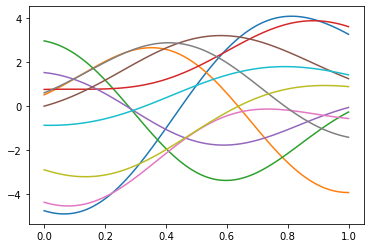

In [12]:
s = sample(h, V_hat, L_hat, n_samples=10)
for i in range(10):
    plt.plot(X_star, s[:, i])
plt.show()

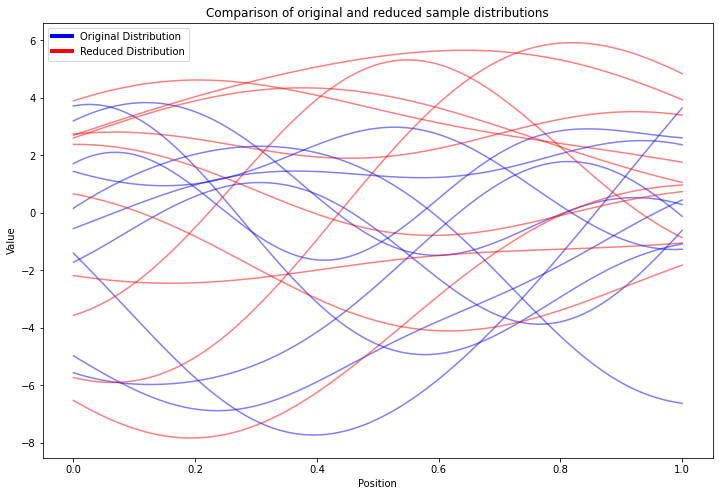

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

s = sample(m_star,V, L, n_samples=10)
s_hat = sample(h, V_hat, L_hat, n_samples=10)
for i in range(10):
    ax.plot(X_star, s[:, i], c='b', alpha=0.5)
    ax.plot(X_star, s_hat[:, i], c='r', alpha=0.5)
    
custom_lines = [Line2D([0], [0], color='b', lw=4, alpha=1),
               Line2D([0], [0], color='r', lw=4, alpha=1)]
ax.legend(custom_lines, ['Original Distribution', 'Reduced Distribution'])
ax.set_xlabel('Position')
ax.set_ylabel('Value')
ax.set_title('Comparison of original and reduced sample distributions')
fig.savefig('figure_2.png', dpi=400)
plt.show()    